In [1]:
from datetime import datetime, timedelta
import pandas as pd
import networkx as nx
from functools import partialmethod
from google.colab import drive
import os
import glob
#from traffic.data import airports
import altair as alt
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox


define lists of airports with more than 50k passengers


In [2]:
# Deutschland
icaolistD=["EDDB", "EDVE", "EDDW", "EDLW", "EDDC", "EDDL", "EDDE", "EDDF", "EDFH", "EDNY", "EDDH", "EDDV", "EDSB", "EDVK", "EDDK", "EDDP", "EDHL", "EDJA", "EDDM", "EDDG", "EDLV", "EDDN", "EDLP", "ETNL", "EDDR", "EDDS", "EDXW"]
markerD='o-'
colorD='red'

# Italien
icaolistI=["LIRF", "LIMC", "LIME", "LIRN", "LIPZ", "LICC", "LIPE", "LIML", "LICJ", "LIBD", "LIRP", "LIEE", "LIMF", "LIRA", "LIPX", "LIEO", "LIBR", "LIRQ", "LIPH", "LICA", "LIEA", "LICT", "LIMJ", "LIPQ", "LIBP", "LIRZ", "LIPY", "LICD", "LICB", "LICR", "LIPR", "LIBC", "LIPK", "LIMP", "LIMZ", "LICG"]
markerI='v-'
colorI='firebrick'

# Spanien - die, die nicht mit LE anfangen, sind abseits des Festlands, vor allem Canaren
icaolistS=["LEZL", "LEZG", "LEXJ", "LEVX", "LEVT", "LEVD", "LEVC", "LEST", "LESO", "LERS", "LEPP", "LEPA", "LEMI", "LEMH", "LEMG", "LEMD", "LELN", "LEJR", "LEIB", "LEGR", "LEGE", "LECO", "LEBZ", "LEBL", "LEBB", "LEAS", "LEAM", "LEAL", "GEML", "GCXO", "GCTS", "GCRR", "GCLP", "GCLA", "GCHI", "GCGM", "GCFV"]
markerS='d-'
colorS='peru'

# Frankreich - alles was nicht LF ist ist Übersee
icaolistF=["LFBD", "LFBE", "LFBH", "LFBL", "LFBO", "LFBP", "LFBT", "LFBZ", "LFGJ", "LFJL", "LFKB", "LFKC", "LFKF", "LFKJ", "LFLB", "LFLC", "LFLL", "LFLS", "LFMK", "LFML", "LFMN", "LFMP", "LFMT", "LFMU", "LFOB", "LFOT", "LFPB", "LFPG", "LFPO", "LFQQ", "LFRB", "LFRK", "LFRN", "LFRS", "LFSB", "LFST", "LFTH", "LFTW", "NTAA", "NTTB", "NTTG", "NTTH", "NTTR", "NWWL", "NWWM", "NWWW", "SOCA", "TFFF", "TFFG", "TFFJ", "TFRR", "FMCZ", "FMEE"]
markerF='^-'
colorF='darkorange'


pick which country to analyse in this runtime

In [3]:
option = 1   # 1=Deutschland, 2=Italien, 3=Spanien, 4=Frankreich
if option == 1:
  icaolist = icaolistD
  countryname = "deutschland"
  markerToUse = markerD
  colorToUse = colorD
elif option == 2:
  icaolist = icaolistI
  countryname = "italien"
  markerToUse = markerI
  colorToUse = colorI
elif option == 3:
  icaolist = icaolistS
  countryname = "spanien"
  markerToUse = markerS
  colorToUse = colorS
elif option  == 4:
  icaolist = icaolistF
  countryname = "frankreich"
  markerToUse = markerF
  colorToUse = colorF


where to read and save the data (and making sure that the directory exist)

In [4]:
drive.mount('/content/drive')
folder_path = "/content/drive/My Drive/2024KomplexeNetze/Ergebnisse"
if not os.path.exists(folder_path):
    print(f'No such folder: {folder_path}')
csv_files = sorted(glob.glob(os.path.join(folder_path, f"ir_{countryname}_*.csv")))
print(csv_files)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/ir_deutschland_20241229_215914.csv']


Load the csv files into dataframe

In [5]:
# always useful
pd.DataFrame.query = partialmethod(pd.DataFrame.query, engine="python")

In [6]:
# Read CSV files from List
#df = pd.concat(map(pd.read_csv, [csv_files[0], csv_files[1]]))
df = pd.read_csv(csv_files[0])
# have a look at the dataframe
df.head()


,Month,WIE,IR,ieflight,neroute,Year
0,1,4.819678,0.662386,47461.0,3526,2018
1,2,4.825629,0.664208,47451.0,3578,2018
2,3,4.847842,0.665649,47453.0,3669,2018
3,4,3.253168,0.691601,49851.0,4406,2018
4,5,3.740522,0.691256,54218.0,5132,2018


Now make some plots of the reults

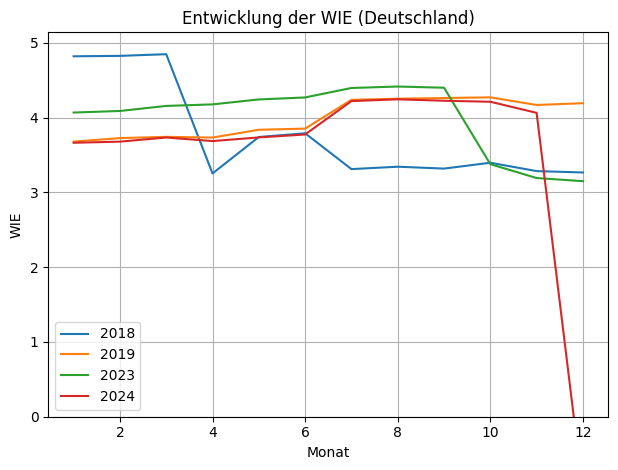

In [7]:
import matplotlib.pyplot as plt

# Group data by year
for year in df['Year'].unique():
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Plot ieflight vs. month for the current year
    plt.plot(year_data['Month'], year_data['WIE'], label=str(year))

# Add labels and title
plt.xlabel('Monat')
plt.ylabel('WIE')
plt.title(f'Entwicklung der WIE ({countryname.capitalize()})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(bottom=0)

filetitle="combi_WIE"
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.png"
plt.savefig(resultfilename)
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.svg"
plt.savefig(resultfilename)

plt.show()

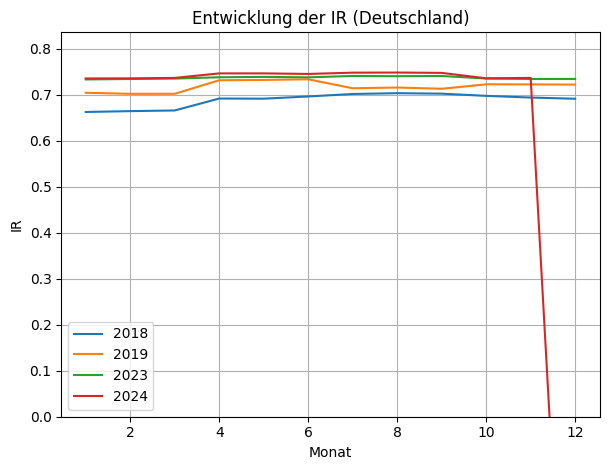

In [8]:
import matplotlib.pyplot as plt

# Group data by year
for year in df['Year'].unique():
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Plot ieflight vs. month for the current year
    plt.plot(year_data['Month'], year_data['IR'], label=str(year))

# Add labels and title
plt.xlabel('Monat')
plt.ylabel('IR')
plt.title(f'Entwicklung der IR ({countryname.capitalize()})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(bottom=0)

filetitle="combi_IR"
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.png"
plt.savefig(resultfilename)
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.svg"
plt.savefig(resultfilename)

plt.show()

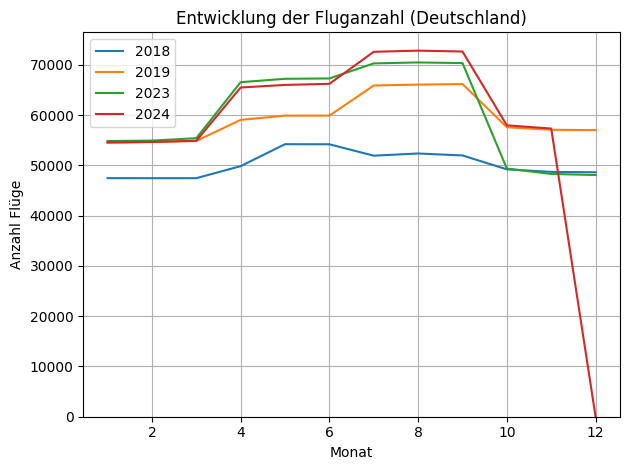

In [9]:
# Group data by year
for year in df['Year'].unique():
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Plot ieflight vs. month for the current year
    plt.plot(year_data['Month'], year_data['ieflight'], label=str(year))

# Add labels and title
plt.xlabel('Monat')
plt.ylabel('Anzahl Flüge')
plt.title(f'Entwicklung der Fluganzahl ({countryname.capitalize()})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(bottom=0)

filetitle="combi_ieflight"
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.png"
plt.savefig(resultfilename)
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.svg"
plt.savefig(resultfilename)

plt.show()


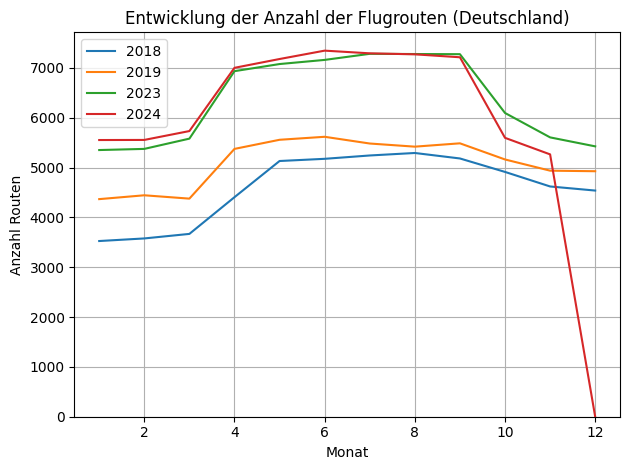

In [10]:
# Group data by year
for year in df['Year'].unique():
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Plot ieflight vs. month for the current year
    plt.plot(year_data['Month'], year_data['neroute'], label=str(year))

# Add labels and title
plt.xlabel('Monat')
plt.ylabel('Anzahl Routen')
plt.title(f'Entwicklung der Anzahl der Flugrouten ({countryname.capitalize()})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(bottom=0)

filetitle="combi_neroute"
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.png"
plt.savefig(resultfilename)
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.svg"
plt.savefig(resultfilename)

plt.show()


Normiert auf 2019 - macht das mehr Sinn?

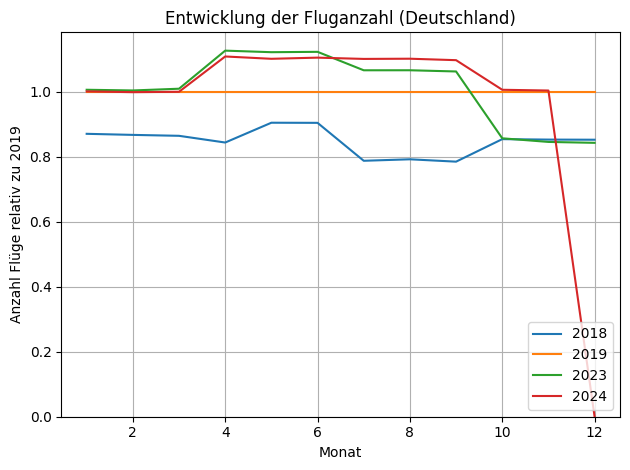

In [11]:
# Find 2019 data
df_2019 = df[df['Year'] == 2019]

# Group data by year
fig, ax = plt.subplots()  # Create a figure and an axes object

for year in df['Year'].unique():
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Normalize 'ieflight' values with respect to 2019 values
    # Match months for normalization
    normalized_ieflight = []
    for month in year_data['Month']:
      try:
          norm_factor = df_2019[df_2019['Month'] == month]['ieflight'].iloc[0]
          if norm_factor != 0:  # avoid division by zero
             normalized_ieflight.append(year_data[year_data['Month'] == month]['ieflight'].iloc[0] / norm_factor)
          else:
              normalized_ieflight.append(0) # or handle the zero case differently
      except IndexError: #handle months that do not exist in 2019 data
          normalized_ieflight.append(0)


    # Plot normalized ieflight vs. month for the current year
    ax.plot(year_data['Month'], normalized_ieflight, label=str(year))

# Add labels and title
ax.set_xlabel('Monat')
ax.set_ylabel('Anzahl Flüge relativ zu 2019')
ax.set_title(f'Entwicklung der Fluganzahl ({countryname.capitalize()})')
ax.grid(True)
ax.set_ylim(bottom=0)

# Sort legend labels
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: int(x[1])) # Sort based on year
handles, labels = zip(*sorted_handles_labels)

# Place legend in the bottom right corner
ax.legend(handles, labels, loc='lower right')


plt.tight_layout()

filetitle="combi_ieflight_sorted_legend"
timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.png"
plt.savefig(resultfilename)
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.svg"
plt.savefig(resultfilename)

plt.show()

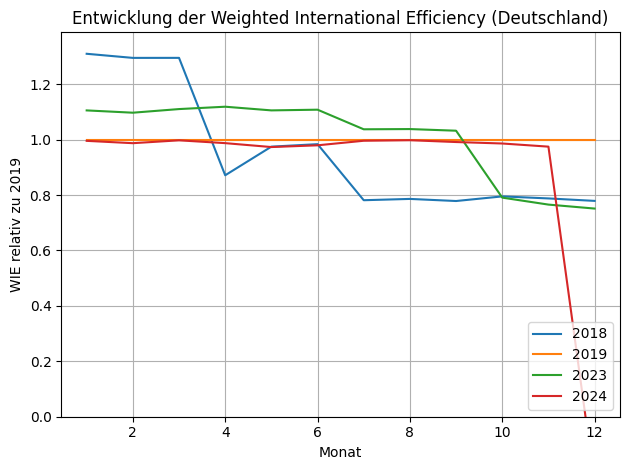

In [12]:
# Group data by year
fig, ax = plt.subplots()  # Create a figure and an axes object

for year in df['Year'].unique():
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Normalize 'WIE' values with respect to 2019 values
    # Match months for normalization
    normalized_WIE = []
    for month in year_data['Month']:
      try:
          norm_factor = df_2019[df_2019['Month'] == month]['WIE'].iloc[0]
          if norm_factor != 0:  # avoid division by zero
             normalized_WIE.append(year_data[year_data['Month'] == month]['WIE'].iloc[0] / norm_factor)
          else:
              normalized_WIE.append(0) # or handle the zero case differently
      except IndexError: #handle months that do not exist in 2019 data
          normalized_WIE.append(0)


    # Plot normalized WIE vs. month for the current year
    ax.plot(year_data['Month'], normalized_WIE, label=str(year))

# Add labels and title
ax.set_xlabel('Monat')
ax.set_ylabel('WIE relativ zu 2019')
ax.set_title(f'Entwicklung der Weighted International Efficiency ({countryname.capitalize()})')
ax.grid(True)
ax.set_ylim(bottom=0)

# Sort legend labels
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: int(x[1])) # Sort based on year
handles, labels = zip(*sorted_handles_labels)

# Place legend in the bottom right corner
ax.legend(handles, labels, loc='lower right')


plt.tight_layout()

filetitle="combi_WIE_sorted_legend"
#timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.png"
plt.savefig(resultfilename)
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.svg"
plt.savefig(resultfilename)

plt.show()

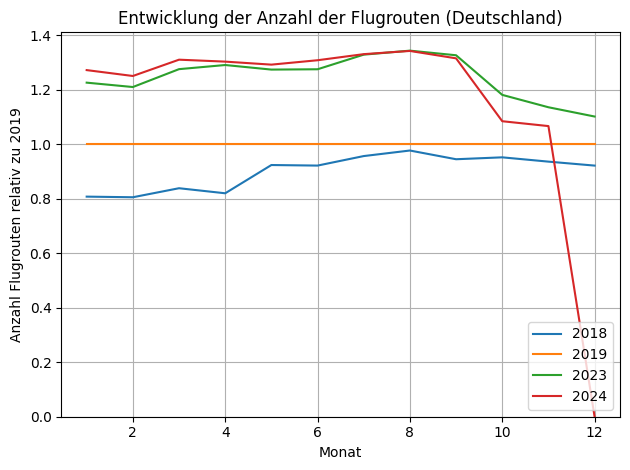

In [13]:
# Group data by year
fig, ax = plt.subplots()  # Create a figure and an axes object

for year in df['Year'].unique():
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Normalize 'neroute' values with respect to 2019 values
    # Match months for normalization
    normalized_neroute = []
    for month in year_data['Month']:
      try:
          norm_factor = df_2019[df_2019['Month'] == month]['neroute'].iloc[0]
          if norm_factor != 0:  # avoid division by zero
             normalized_neroute.append(year_data[year_data['Month'] == month]['neroute'].iloc[0] / norm_factor)
          else:
              normalized_neroute.append(0) # or handle the zero case differently
      except IndexError: #handle months that do not exist in 2019 data
          normalized_neroute.append(0)


    # Plot normalized neroute vs. month for the current year
    ax.plot(year_data['Month'], normalized_neroute, label=str(year))

# Add labels and title
ax.set_xlabel('Monat')
plt.ylabel('Anzahl Flugrouten relativ zu 2019')
plt.title(f'Entwicklung der Anzahl der Flugrouten ({countryname.capitalize()})')
ax.grid(True)
ax.set_ylim(bottom=0)

# Sort legend labels
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: int(x[1])) # Sort based on year
handles, labels = zip(*sorted_handles_labels)

# Place legend in the bottom right corner
ax.legend(handles, labels, loc='lower right')


plt.tight_layout()

filetitle="combi_neroute_sorted_legend"
#timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.png"
plt.savefig(resultfilename)
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.svg"
plt.savefig(resultfilename)

plt.show()

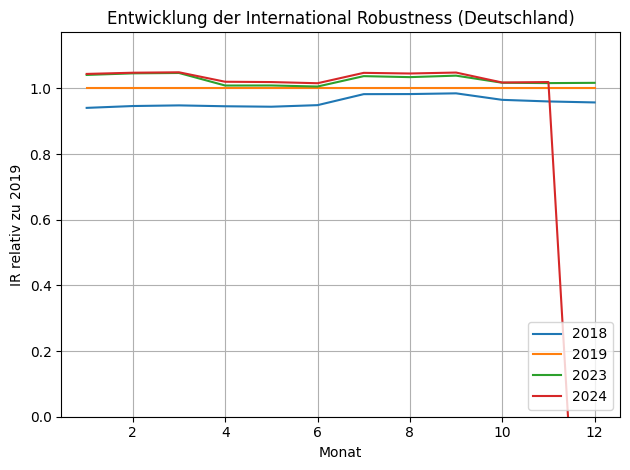

In [14]:
# Group data by year
fig, ax = plt.subplots()  # Create a figure and an axes object

for year in df['Year'].unique():
    # Filter data for the current year
    year_data = df[df['Year'] == year]

    # Normalize 'IR' values with respect to 2019 values
    # Match months for normalization
    normalized_IR = []
    for month in year_data['Month']:
      try:
          norm_factor = df_2019[df_2019['Month'] == month]['IR'].iloc[0]
          if norm_factor != 0:  # avoid division by zero
             normalized_IR.append(year_data[year_data['Month'] == month]['IR'].iloc[0] / norm_factor)
          else:
              normalized_IR.append(0) # or handle the zero case differently
      except IndexError: #handle months that do not exist in 2019 data
          normalized_IR.append(0)


    # Plot normalized IR vs. month for the current year
    ax.plot(year_data['Month'], normalized_IR, label=str(year))

# Add labels and title
ax.set_xlabel('Monat')
ax.set_ylabel('IR relativ zu 2019')
ax.set_title(f'Entwicklung der International Robustness ({countryname.capitalize()})')
ax.grid(True)
ax.set_ylim(bottom=0)

# Sort legend labels
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: int(x[1])) # Sort based on year
handles, labels = zip(*sorted_handles_labels)

# Place legend in the bottom right corner
ax.legend(handles, labels, loc='lower right')


plt.tight_layout()

filetitle="combi_IR_sorted_legend"
#timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.png"
plt.savefig(resultfilename)
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.svg"
plt.savefig(resultfilename)

plt.show()

Not look at the WIEs.

In [15]:
wie_files = sorted(glob.glob(os.path.join(folder_path, f"wie_{countryname}_*.csv")))
print(wie_files)
df_wie = pd.read_csv(wie_files[0])

# add column with name of month in German
month_names = {
    1: "Januar", 2: "Februar", 3: "März", 4: "April", 5: "Mai", 6: "Juni",
    7: "Juli", 8: "August", 9: "September", 10: "Oktober", 11: "November", 12: "Dezember"
}
df_wie["month_german"] = df_wie["month"].map(month_names)

#remove the word " Airport" from all entries in removed_nodes in df_wie

df_wie['removed_nodes'] = df_wie['removed_nodes'].str.replace(' Airport', '', regex=False)

df_wie.tail()

['/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/wie_deutschland_20241229_215914.csv']


,month,year,removed_nodes,ratio_values,month_german
1980,11,2024,Lübeck Blankensee,0.017901,November
1981,11,2024,Westerland Sylt,0.012160,November
1982,11,2024,Erfurt-Weimar,0.005962,November
1983,11,2024,Saarbrücken,0.002770,November
1984,11,2024,Rostock-Laage,0.000000,November


Analyse based on year now.

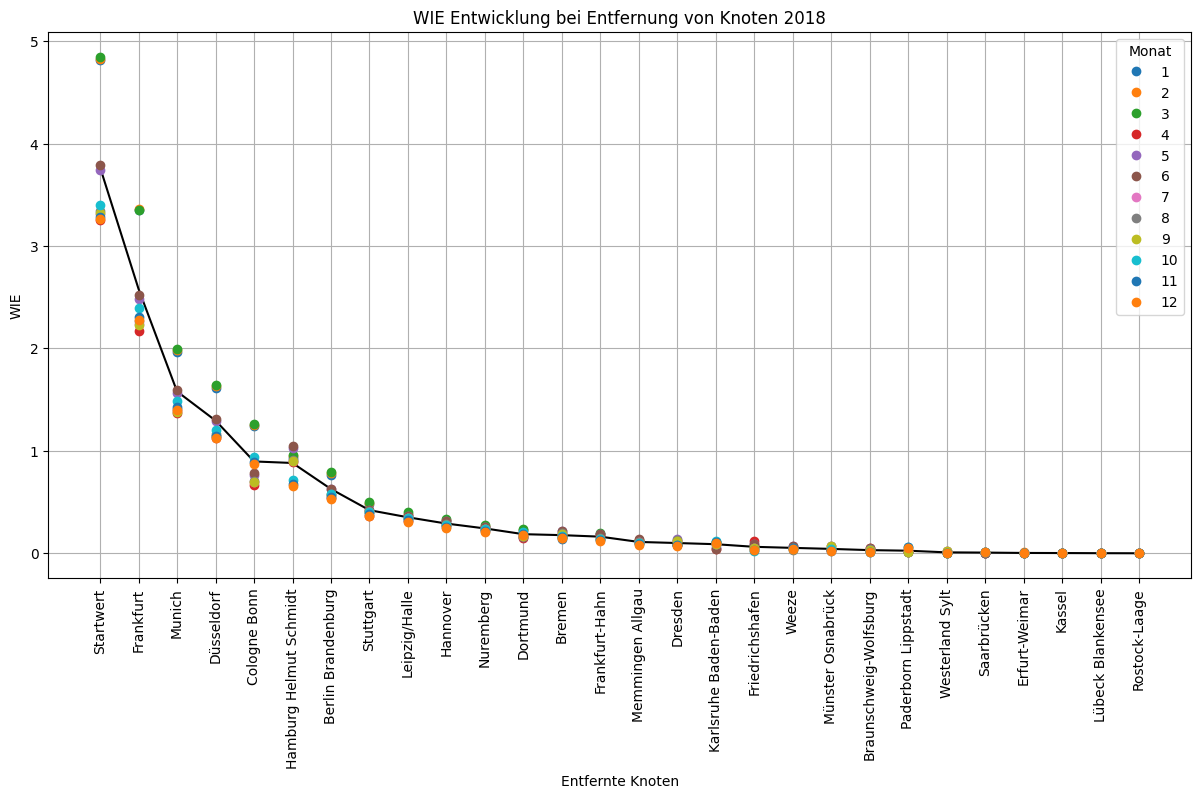

<ipython-input-16-1ddd480d38b1>:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_average_WIE = pd.concat([df_average_WIE, df_average_ratio])


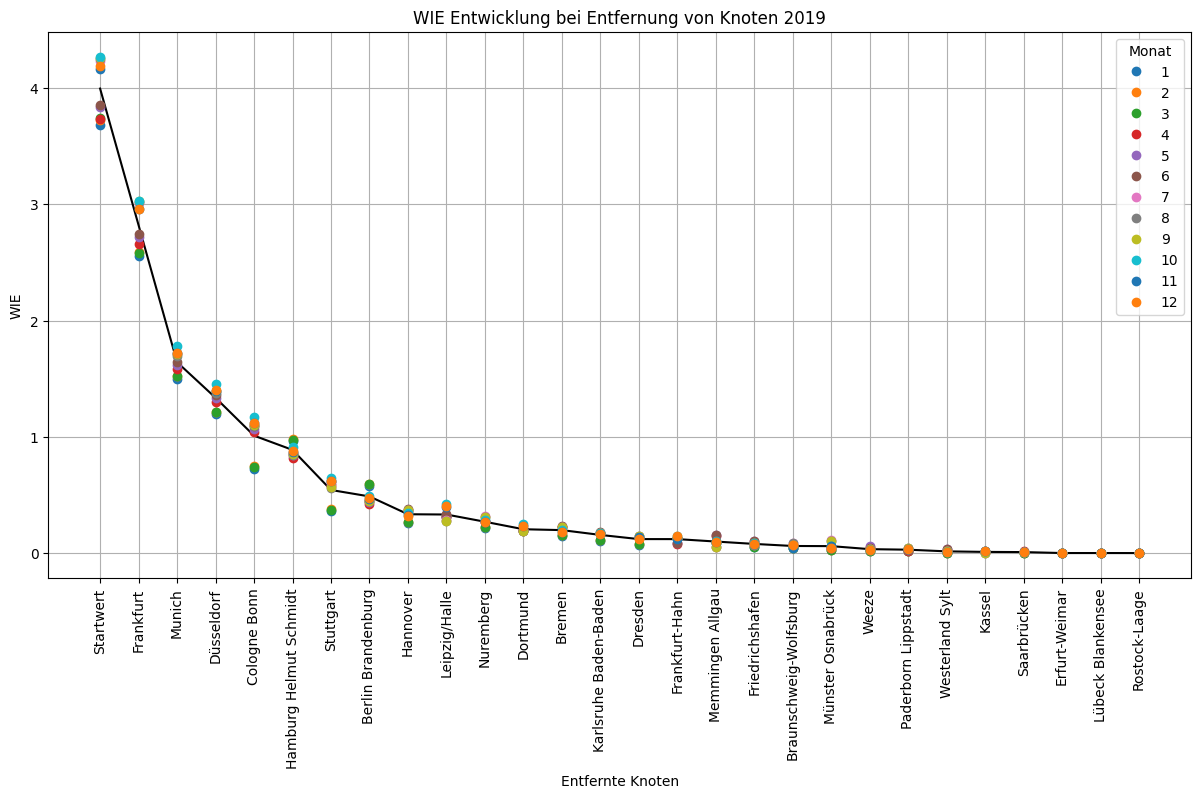

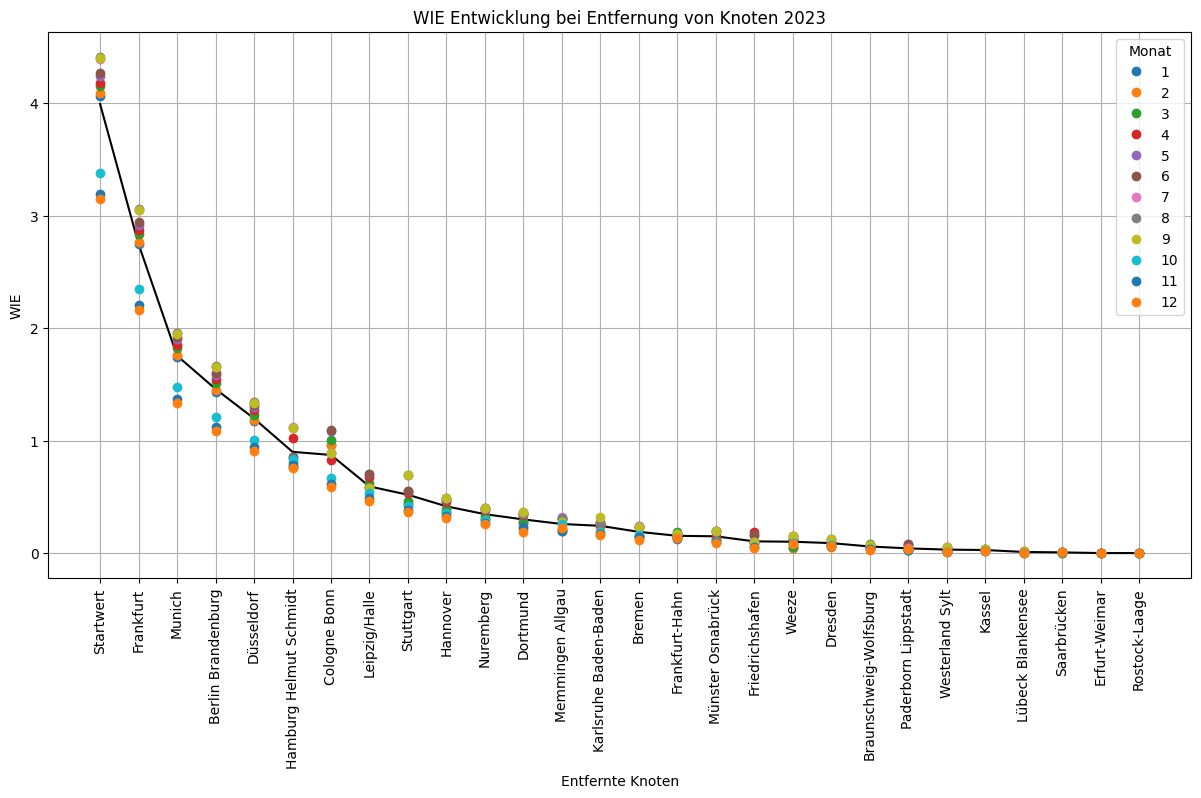

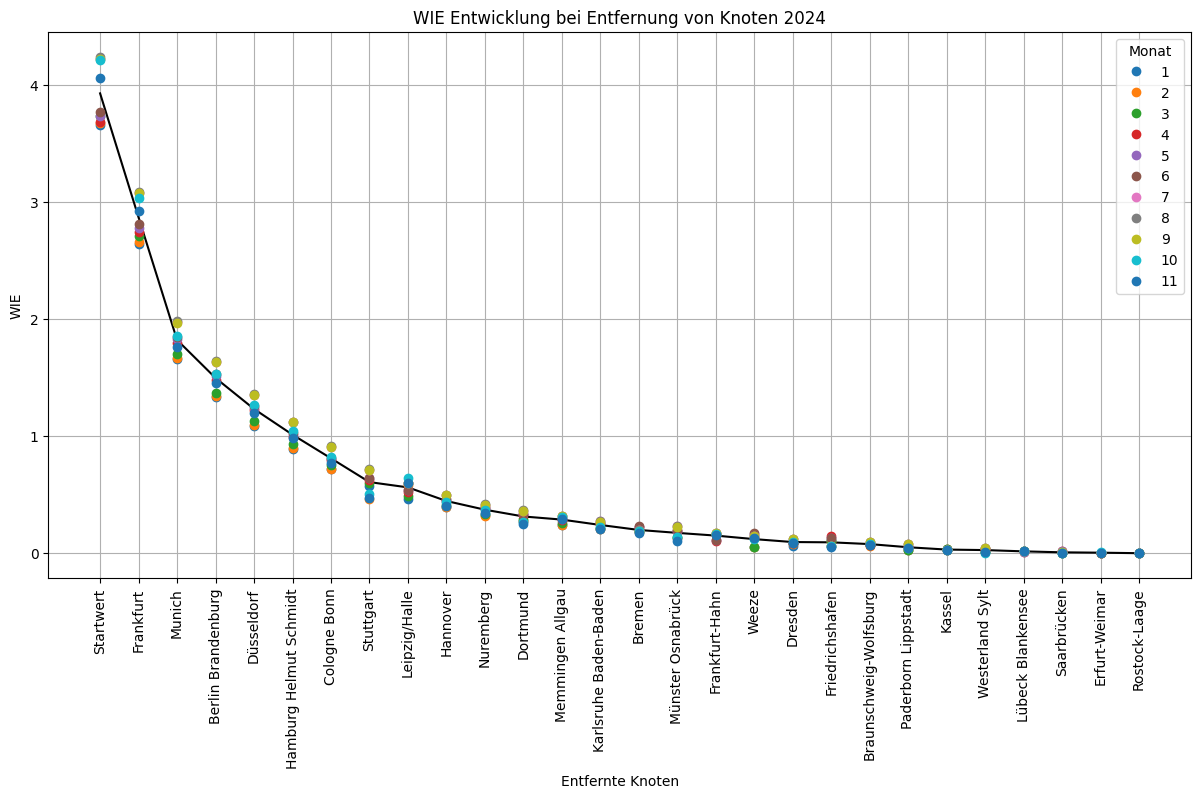

        removed_nodes  ratio_values  year
24          Startwert      3.766405  2018
8           Frankfurt      2.579067  2018
18             Munich      1.579415  2018
6          Düsseldorf      1.295326  2018
3        Cologne Bonn      0.896412  2018
..                ...           ...   ...
27    Westerland Sylt      0.027210  2024
16  Lübeck Blankensee      0.016300  2024
23        Saarbrücken      0.008013  2024
7       Erfurt-Weimar      0.004922  2024
22      Rostock-Laage      0.000658  2024

[112 rows x 3 columns]


In [16]:
#loop over the years 2018, 2019, 2023, 2024, find the average ratio_values per year and fill a new data frame. plot all.

df_average_WIE = pd.DataFrame(columns=['removed_nodes', 'ratio_values', 'year'])

years = [2018, 2019, 2023, 2024]
for year in years:
  # Filter data for the current year
  year_data = df_wie[df_wie['year'] == year]

  # Calculate the average ratio_values for each removed_nodes
  average_ratio = year_data.groupby('removed_nodes')['ratio_values'].mean().reset_index()

  # Sort the removed_nodes based on the average ratio_values in descending order
  average_ratio = average_ratio.sort_values(by='ratio_values', ascending=False)

  plt.figure(figsize=(12, 6))  # Set figure size to twice the width
  plt.plot(average_ratio['removed_nodes'], average_ratio['ratio_values'], marker='', color='black', linestyle='-')

  # Group data by month and plot with colored markers
  for month, month_data in year_data.groupby('month'):
      plt.plot(month_data['removed_nodes'], month_data['ratio_values'], marker='o', linestyle='', label=month)


  plt.tight_layout()
  plt.xlabel('Entfernte Knoten')
  plt.xticks(rotation=90)
  plt.title(f'WIE Entwicklung bei Entfernung von Knoten {year}')
  plt.ylabel('WIE')
  #plt.yticks(rotation=90)
  plt.grid(True)
  plt.legend(title='Monat')

  filetitle=f"yearly_WIE_{year}"
  resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.png"
  plt.savefig(resultfilename)
  resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.svg"
  plt.savefig(resultfilename)
  plt.show()

  # fill a new data frame with the average_ratio, removed_nodes, and year
  df_average_ratio = pd.DataFrame(columns=['removed_nodes', 'ratio_values', 'year'])
  df_average_ratio['removed_nodes'] = average_ratio['removed_nodes']
  df_average_ratio['ratio_values'] = average_ratio['ratio_values']
  df_average_ratio['year'] = year
  # concat df_average_ratio to df_average_WIE
  df_average_WIE = pd.concat([df_average_WIE, df_average_ratio])

print(df_average_WIE)
df_average_WIE.to_csv(f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/average_ratio_{countryname}.csv", index=False)


Another way to look at it: instead of total WIE, use change caused by an airport on the y-axis (aka the difference in WIE with/without it)

In [17]:

# Create an empty DataFrame to store the differences
df_diff = pd.DataFrame(columns=['year', 'month', 'removed_node', 'difference'])


years = [2018, 2019, 2023, 2024]
for year in years:
  # Loop over unique months
  for month in df_wie['month'].unique():
    # Filter data for the current year and month
    current_data = df_wie[(df_wie['year'] == year) & (df_wie['month'] == month)]

    # Sort the data by ratio_values in descending order
    current_data_sorted = current_data.sort_values('ratio_values', ascending=False)
    # reset index
    current_data_sorted = current_data_sorted.reset_index(drop=True)

    # Iterate over removed_nodes, calculate the difference, and add to df_diff
    for index, row in current_data_sorted.iterrows():
      if row['removed_nodes'] != "Startwert":
        difference = current_data_sorted['ratio_values'].iloc[index - 1] - row['ratio_values']
        new_row = pd.DataFrame({'year': [year], 'month': [month], 'removed_node': [row['removed_nodes']], 'difference': [difference]})
        df_diff = pd.concat([df_diff, new_row], ignore_index=True)

# Print or save the df_diff DataFrame
print(df_diff)
df_diff.to_csv(f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/df_diff_{countryname}.csv", index=False)

<ipython-input-17-f4956bf4f668>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_diff = pd.concat([df_diff, new_row], ignore_index=True)


      year month            removed_node  difference
0     2018     1               Frankfurt    1.470267
1     2018     1                  Munich    1.380818
2     2018     1              Düsseldorf    0.355075
3     2018     1            Cologne Bonn    0.370712
4     2018     1  Hamburg Helmut Schmidt    0.309947
...    ...   ...                     ...         ...
1261  2024    11       Lübeck Blankensee    0.010697
1262  2024    11         Westerland Sylt    0.005741
1263  2024    11           Erfurt-Weimar    0.006198
1264  2024    11             Saarbrücken    0.003192
1265  2024    11           Rostock-Laage    0.002770

[1266 rows x 4 columns]


In [18]:
# Create an empty DataFrame to store the yearly average differences
df_diff_avg = pd.DataFrame(columns=['removed_node', 'avg_difference', 'year'])

# Define the years to loop over
years = [2018, 2019, 2023, 2024]

# Loop over the specified years
for year in years:
  # Filter the df_diff DataFrame for the current year
  yearly_data = df_diff[df_diff['year'] == year]

  # Group by 'removed_node' and calculate the mean difference for each node
  avg_diff = yearly_data.groupby('removed_node')['difference'].mean().reset_index()
  avg_diff = avg_diff.rename(columns={'difference': 'avg_difference'})

  # Add the year column
  avg_diff['year'] = year

  # Append to the main DataFrame
  df_diff_avg = pd.concat([df_diff_avg, avg_diff], ignore_index=True)

# Display the resulting DataFrame
print(df_diff_avg)

# Save the resulting DataFrame to a CSV file (optional)
df_diff_avg.to_csv(f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/df_diff_avg_{countryname}.csv", index=False)

               removed_node  avg_difference  year
0        Berlin Brandenburg        0.139075  2018
1    Braunschweig-Wolfsburg        0.012648  2018
2                    Bremen        0.039677  2018
3              Cologne Bonn        0.274264  2018
4                  Dortmund        0.029653  2018
..                      ...             ...   ...
103           Rostock-Laage        0.003215  2024
104             Saarbrücken        0.005506  2024
105               Stuttgart        0.160296  2024
106                   Weeze        0.018728  2024
107         Westerland Sylt        0.011293  2024

[108 rows x 3 columns]


<ipython-input-18-7d20bbefbbb6>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_diff_avg = pd.concat([df_diff_avg, avg_diff], ignore_index=True)


plot avg_difference vs removed_node, grouped by year.

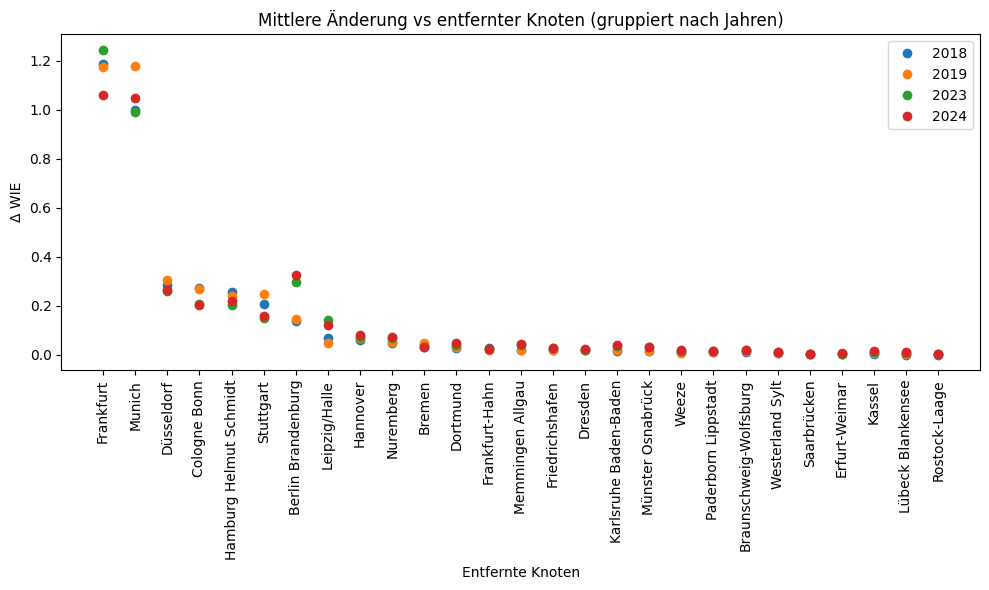

In [19]:
import matplotlib.pyplot as plt

# Assuming df_diff_avg is already defined as in the provided code

# Sort the DataFrame for 2018
df_2018 = df_diff_avg[df_diff_avg['year'] == 2018].sort_values(by='avg_difference', ascending=False)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through years and plot
for year in df_diff_avg['year'].unique():
    year_data = df_diff_avg[df_diff_avg['year'] == year]
    if year == 2018:
        year_data = df_2018  # Use the sorted data for 2018
    ax.plot(year_data['removed_node'], year_data['avg_difference'], marker='o', linestyle='', label=str(year))

# Customize the plot
ax.set_xlabel('Entfernte Knoten')
ax.set_ylabel('Δ WIE')
ax.set_title('Mittlere Änderung vs entfernter Knoten (gruppiert nach Jahren)')
ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability
ax.legend(loc='upper right')
plt.tight_layout()


# Save and display the plot
filetitle = "avg_diff_vs_removed_node_grouped_by_year"
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.png"
plt.savefig(resultfilename)
plt.show()

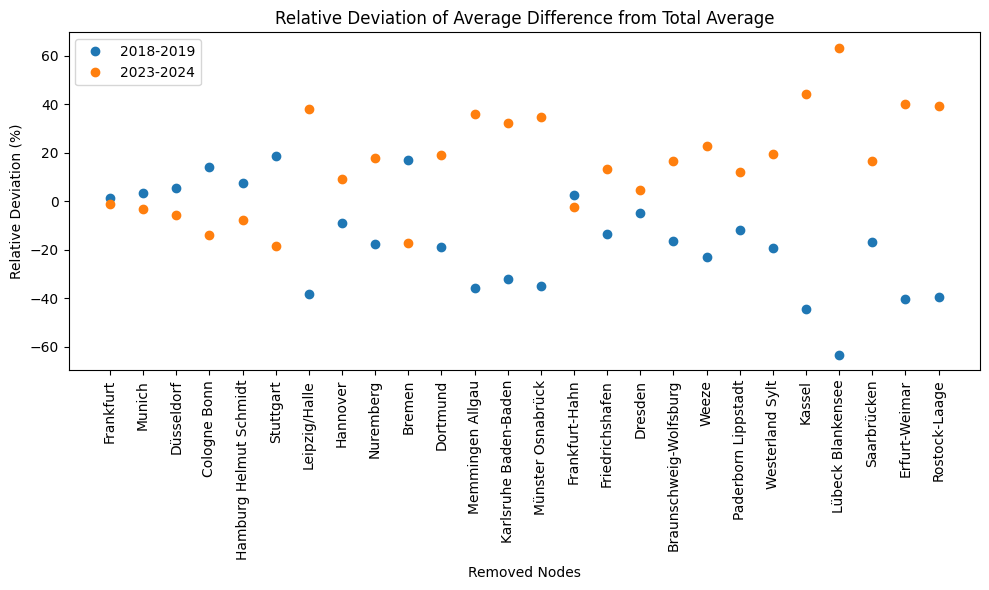

In [20]:

# Remove rows where 'removed_node' contains "Berlin"
df_diff_avg = df_diff_avg[~df_diff_avg['removed_node'].str.contains("Berlin")]

# Calculate the total average for each removed_node across all years
total_average_diff = df_diff_avg.groupby('removed_node')['avg_difference'].mean().reset_index()
total_average_diff = total_average_diff.rename(columns={'avg_difference': 'total_avg_difference'})

# Sort the DataFrame by total average difference in descending order
total_average_diff = total_average_diff.sort_values(by='total_avg_difference', ascending=False)

# Calculate the average for 2018-2019
avg_2018_2019 = df_diff_avg[df_diff_avg['year'].isin([2018, 2019])].groupby('removed_node')['avg_difference'].mean().reset_index()
avg_2018_2019 = avg_2018_2019.rename(columns={'avg_difference': 'avg_2018_2019'})
total_average_diff = pd.merge(total_average_diff, avg_2018_2019, on='removed_node', how='left')


# Calculate the average for 2023-2024
avg_2023_2024 = df_diff_avg[df_diff_avg['year'].isin([2023, 2024])].groupby('removed_node')['avg_difference'].mean().reset_index()
avg_2023_2024 = avg_2023_2024.rename(columns={'avg_difference': 'avg_2023_2024'})
total_average_diff = pd.merge(total_average_diff, avg_2023_2024, on='removed_node', how='left')


# Calculate the relative deviation
total_average_diff['deviation_2018_2019'] = ((total_average_diff['avg_2018_2019'] - total_average_diff['total_avg_difference']) / total_average_diff['total_avg_difference']) * 100
total_average_diff['deviation_2023_2024'] = ((total_average_diff['avg_2023_2024'] - total_average_diff['total_avg_difference']) / total_average_diff['total_avg_difference']) * 100


#Plot
plt.figure(figsize=(10,6))
plt.plot(total_average_diff['removed_node'], total_average_diff['deviation_2018_2019'], marker='o', linestyle='', label='2018-2019')
plt.plot(total_average_diff['removed_node'], total_average_diff['deviation_2023_2024'], marker='o', linestyle='', label='2023-2024')

plt.xlabel('Removed Nodes')
plt.ylabel('Relative Deviation (%)')
plt.title('Relative Deviation of Average Difference from Total Average')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()


# Save and display the plot
filetitle = "relative_dev_of_average_diff_vs_removed_node_grouped_by_year"
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.png"
plt.savefig(resultfilename)
plt.show()

Compare deviation of pre-pandemic / post-pandemic to total average

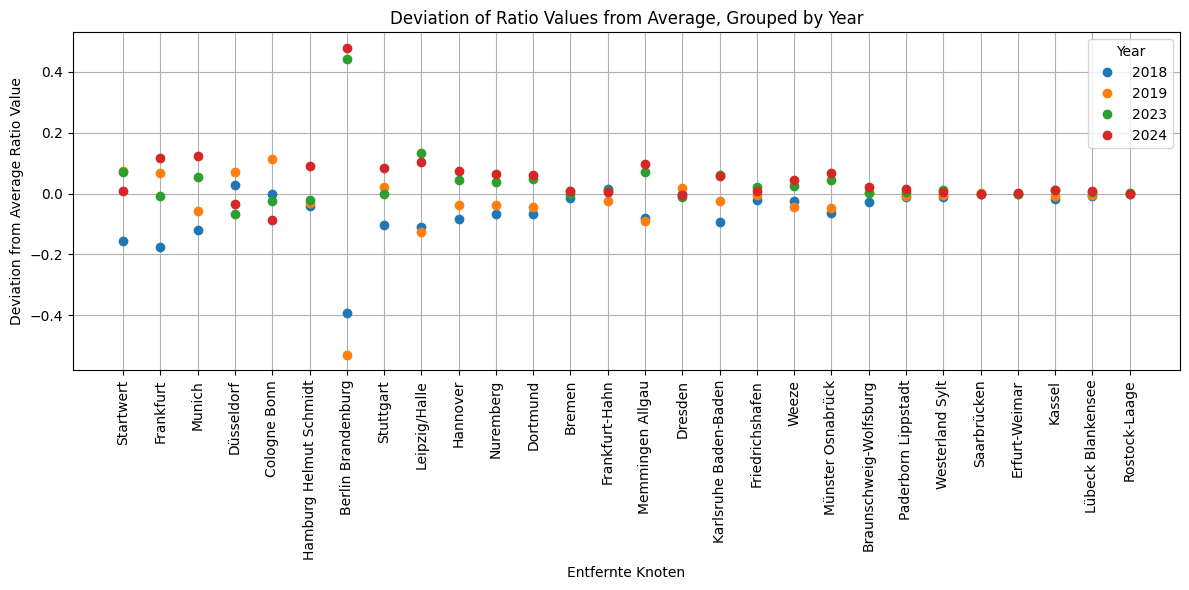

In [21]:
# Calculate the average ratio_values for each removed_nodes
average_ratio_per_node = df_average_WIE.groupby('removed_nodes')['ratio_values'].mean().reset_index()

# Sort the average values by ratio_values in descending order
average_ratio_per_node = average_ratio_per_node.sort_values(by='ratio_values', ascending=False)


# Calculate the deviation from the average for each data point
df_average_WIE['deviation'] = df_average_WIE.apply(lambda row: row['ratio_values'] - average_ratio_per_node[average_ratio_per_node['removed_nodes'] == row['removed_nodes']]['ratio_values'].iloc[0], axis=1)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

for year, year_data in df_average_WIE.groupby('year'):
    ax.plot(year_data['removed_nodes'], year_data['deviation'], marker='o', linestyle='', label=str(year))

ax.set_xlabel('Entfernte Knoten')
ax.set_ylabel('Deviation from Average Ratio Value')
ax.set_title('Deviation of Ratio Values from Average, Grouped by Year')
ax.grid(True)
plt.xticks(rotation=90)

# Sort the legend labels
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: int(x[1]))
handles, labels = zip(*sorted_handles_labels)
ax.legend(handles, labels, title='Year')


plt.tight_layout()
plt.show()

Hinweis: Für den Flughafen Berlin-Brandenburg: Die Inbetriebnahme des Terminals 1 erfolgte am 31. Oktober 2020. Die Inbetriebnahme von Terminal 2 erfolgte im Sommer 2022.

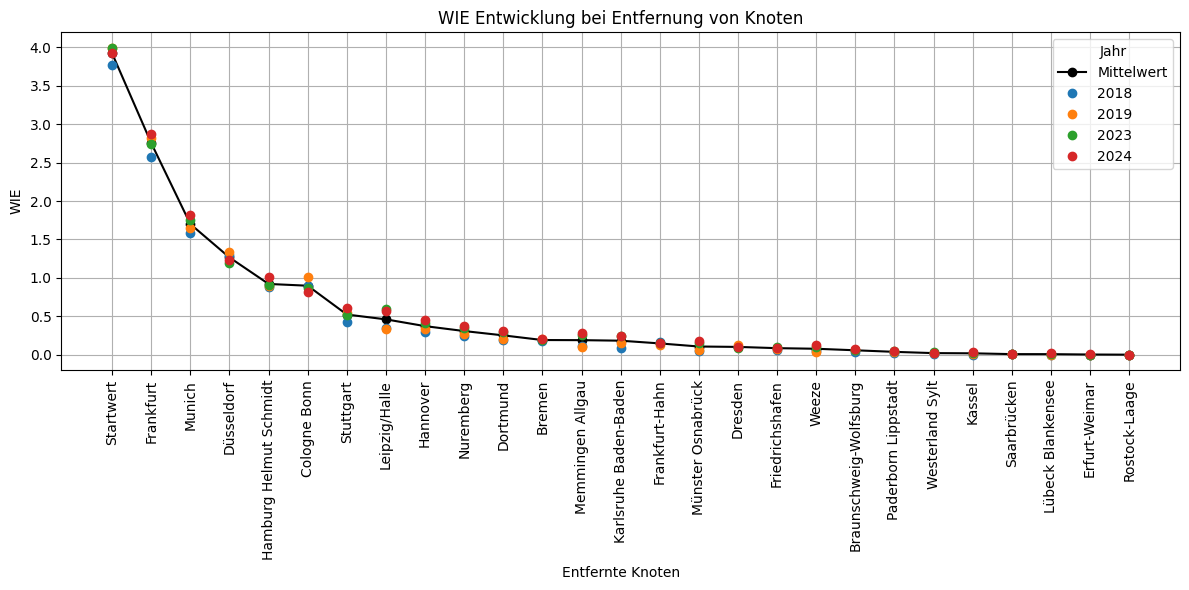

In [22]:
# Remove rows where 'removed_nodes' contains "Berlin"
df_average_WIE_filtered = df_average_WIE[~df_average_WIE['removed_nodes'].str.contains("Berlin")]

# Calculate the average for each value of removed_nodes
average_ratio_per_node = df_average_WIE_filtered.groupby('removed_nodes')['ratio_values'].mean().reset_index()

# Sort the average values by ratio_values in descending order
average_ratio_per_node = average_ratio_per_node.sort_values(by='ratio_values', ascending=False)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average ratio_values vs. removed_nodes
ax1.plot(average_ratio_per_node['removed_nodes'], average_ratio_per_node['ratio_values'], marker='o', linestyle='-', color='black', label='Mittelwert')
ax1.set_xlabel('Entfernte Knoten')
ax1.set_ylabel('WIE')
ax1.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=90)

# Plot ratio_values vs. removed_nodes, grouped by year
for year, year_data in df_average_WIE_filtered.groupby('year'):
    ax1.plot(year_data['removed_nodes'], year_data['ratio_values'], marker='o', linestyle='', label=str(year))

#ax2.set_ylabel('Ratio Values', color='black')
#ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper right')
#ax1.legend(lines + lines2, labels + labels2, loc='upper right')


plt.title(f'WIE Entwicklung bei Entfernung von Knoten')
plt.legend(title='Jahr')
plt.grid(True)
plt.tight_layout()

filetitle=f"average_yearly_WIE"
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.png"
plt.savefig(resultfilename)
resultfilename = f"/content/drive/My Drive/2024KomplexeNetze/Ergebnisse/{filetitle}_{countryname}.svg"
plt.savefig(resultfilename)

plt.show()

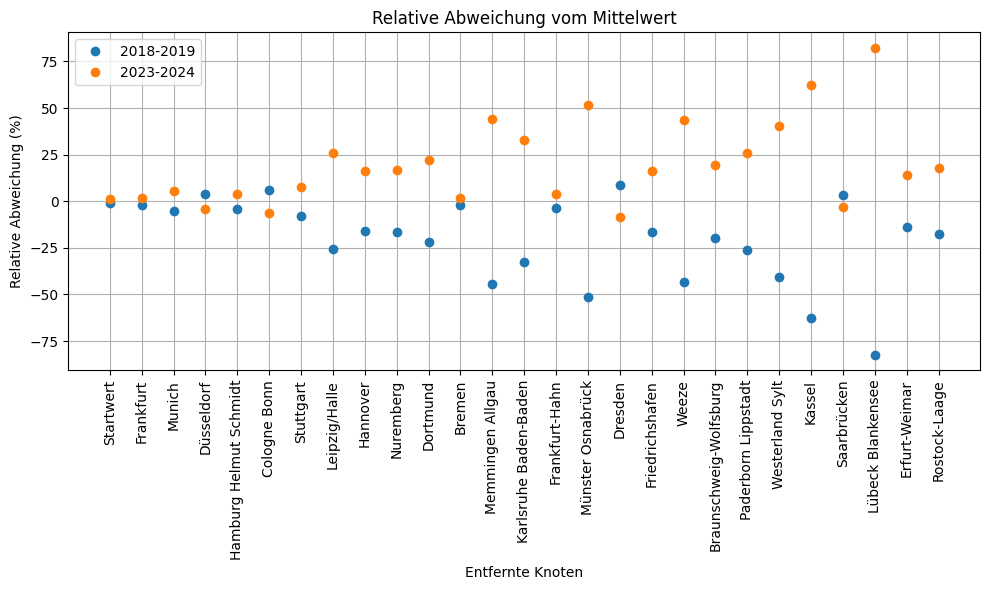

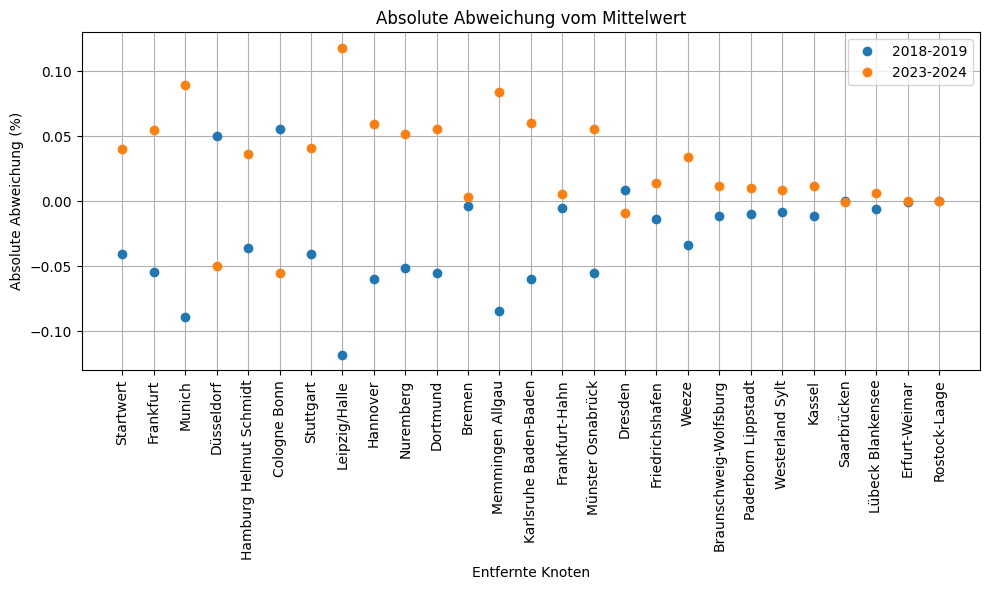

In [23]:
# Remove rows where 'removed_nodes' contains "Berlin"
df_average_WIE = df_average_WIE[~df_average_WIE['removed_nodes'].str.contains("Berlin")]

# Calculate the total average for each removed_nodes across all years
total_average_WIE = df_average_WIE.groupby('removed_nodes')['ratio_values'].mean().reset_index()
total_average_WIE.rename(columns={'ratio_values': 'total_average'}, inplace=True)

# Sort by total average in descending order
total_average_WIE = total_average_WIE.sort_values('total_average', ascending=False)

# Calculate the average for 2018-2019
avg_2018_2019 = df_average_WIE[(df_average_WIE['year'] == 2018) | (df_average_WIE['year'] == 2019)].groupby('removed_nodes')['ratio_values'].mean().reset_index()
avg_2018_2019.rename(columns={'ratio_values': 'avg_2018_2019'}, inplace=True)
total_average_WIE = pd.merge(total_average_WIE, avg_2018_2019, on='removed_nodes', how='left')

# Calculate the average for 2023-2024
avg_2023_2024 = df_average_WIE[(df_average_WIE['year'] == 2023) | (df_average_WIE['year'] == 2024)].groupby('removed_nodes')['ratio_values'].mean().reset_index()
avg_2023_2024.rename(columns={'ratio_values': 'avg_2023_2024'}, inplace=True)
total_average_WIE = pd.merge(total_average_WIE, avg_2023_2024, on='removed_nodes', how='left')

# Calculate relative deviations
total_average_WIE['deviation_2018_2019'] = ((total_average_WIE['avg_2018_2019'] - total_average_WIE['total_average']) / total_average_WIE['total_average']) * 100
total_average_WIE['deviation_2023_2024'] = ((total_average_WIE['avg_2023_2024'] - total_average_WIE['total_average']) / total_average_WIE['total_average']) * 100

# Calculate absolute deviations
total_average_WIE['absdev_2018_2019'] = ((total_average_WIE['avg_2018_2019'] - total_average_WIE['total_average']) )
total_average_WIE['absdev_2023_2024'] = ((total_average_WIE['avg_2023_2024'] - total_average_WIE['total_average']) )


#Plot
plt.figure(figsize=(10,6))
plt.plot(total_average_WIE['removed_nodes'], total_average_WIE['deviation_2018_2019'], marker='o', linestyle='', label='2018-2019')
plt.plot(total_average_WIE['removed_nodes'], total_average_WIE['deviation_2023_2024'], marker='o', linestyle='', label='2023-2024')

plt.xlabel('Entfernte Knoten')
plt.ylabel('Relative Abweichung (%)')
plt.title('Relative Abweichung vom Mittelwert')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



#Plot
plt.figure(figsize=(10,6))
plt.plot(total_average_WIE['removed_nodes'], total_average_WIE['absdev_2018_2019'], marker='o', linestyle='', label='2018-2019')
plt.plot(total_average_WIE['removed_nodes'], total_average_WIE['absdev_2023_2024'], marker='o', linestyle='', label='2023-2024')

plt.xlabel('Entfernte Knoten')
plt.ylabel('Absolute Abweichung (%)')
plt.title('Absolute Abweichung vom Mittelwert')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()